# Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout


2024-02-11 08:18:39.044390: I tensorflow/core/platform/cpu_feature_guard.cc:181] Beginning TensorFlow 2.15, this package will be updated to install stock TensorFlow 2.15 alongside Intel's TensorFlow CPU extension plugin, which provides all the optimizations available in the package and more. If a compatible version of stock TensorFlow is present, only the extension will get installed. No changes to code or installation setup is needed as a result of this change.
More information on Intel's optimizations for TensorFlow, delivered as TensorFlow extension plugin can be viewed at https://github.com/intel/intel-extension-for-tensorflow.
2024-02-11 08:18:39.044413: I tensorflow/core/platform/cpu_feature_guard.cc:192] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropri

In [5]:
warnings.filterwarnings('ignore')

# Data Preprocessing

In [41]:
#Load the dataset
stock = pd.read_csv("msft-daily-max.csv")
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,3/13/1986,0.088542,0.101563,0.088542,0.097222,1031788800,0.060524
1,3/14/1986,0.097222,0.102431,0.097222,0.100694,308160000,0.062686
2,3/17/1986,0.100694,0.103299,0.100694,0.102431,133171200,0.063767
3,3/18/1986,0.102431,0.103299,0.098958,0.099826,67766400,0.062145
4,3/19/1986,0.099826,0.100694,0.097222,0.098090,47894400,0.061065


In [7]:
from datetime import datetime
stock['Date'] = pd.to_datetime(stock['Date'])
stock = stock.set_index('Date')

In [8]:
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800,0.060524
1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,0.062686
1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,0.063767
1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,0.062145
1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,0.061065


<Axes: >

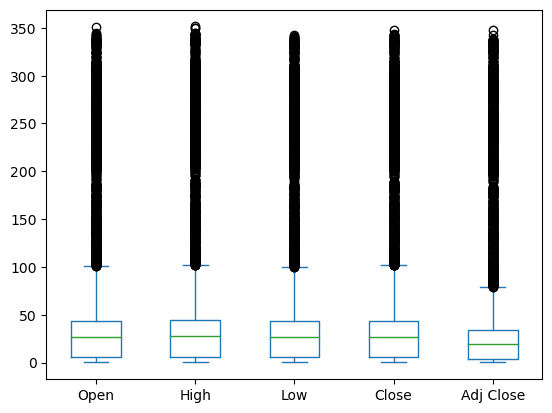

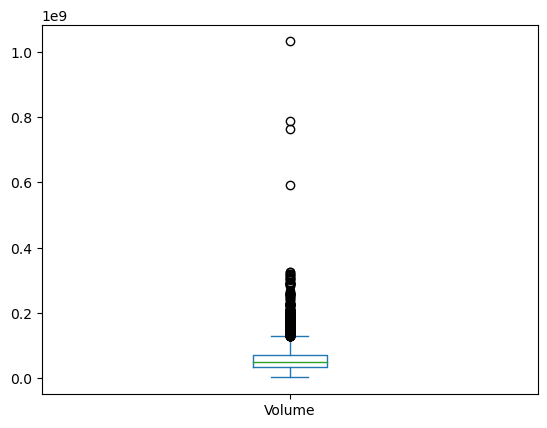

In [9]:
# Box plot to check whether outliers are present or not

stock[['Open','High','Low','Close','Adj Close',]].plot(kind='box')
stock[['Volume']].plot(kind='box')

In [10]:
q1, q3 = np.percentile(stock['Open'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock[(stock['Open'] >= lower_bound)
                & (stock['Open'] <= upper_bound)]

q1, q3 = np.percentile(stock['High'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock[(stock['High'] >= lower_bound)
                & (stock['High'] <= upper_bound)]

q1, q3 = np.percentile(stock['Low'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock[(stock['Low'] >= lower_bound)
                & (stock['Low'] <= upper_bound)]

q1, q3 = np.percentile(stock['Close'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock[(stock['Close'] >= lower_bound)
                & (stock['Close'] <= upper_bound)]

q1, q3 = np.percentile(stock['Adj Close'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock[(stock['Adj Close'] >= lower_bound)
                & (stock['Adj Close'] <= upper_bound)]

q1, q3 = np.percentile(stock['Volume'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock[(stock['Volume'] >= lower_bound)
                & (stock['Volume'] <= upper_bound)]

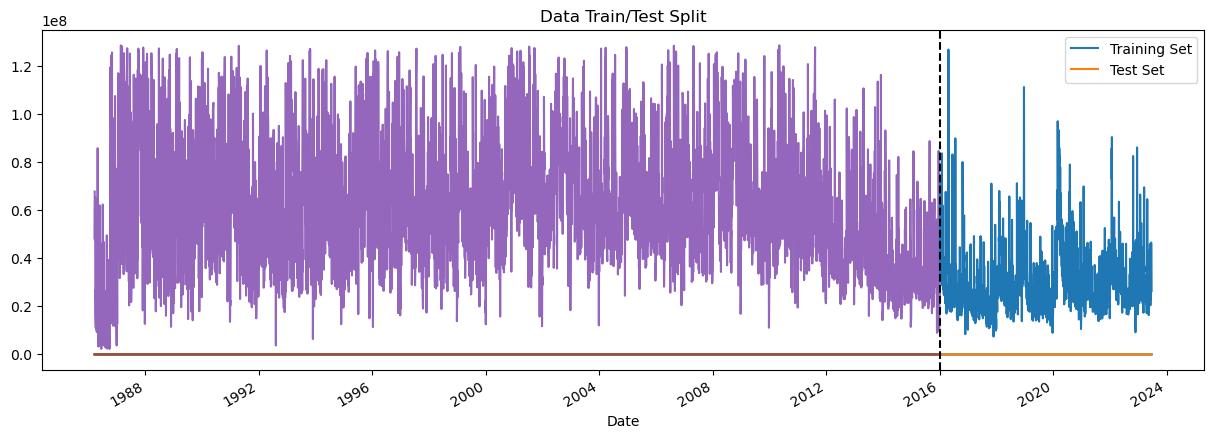

In [11]:
train = clean_data.loc[clean_data.index < '01-02-2016']
test = clean_data.loc[clean_data.index >= '01-02-2016']

# Plot the data
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-02-2016', color='black', linestyle='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [12]:
clean_data['Date']=clean_data.index

In [13]:
clean_data["year"] = clean_data["Date"].dt.year
clean_data["month"] = clean_data["Date"].dt.month
clean_data["day_of_week"] = clean_data["Date"].dt.dayofweek

In [14]:
clean_data = clean_data.drop(['Date'], axis=1)

In [15]:
clean_data.head()

,Open,High,Low,Close,Volume,Adj Close,year,month,day_of_week
Date,,,,,,,,,
1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,0.062145,1986,3,1
1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,0.061065,1986,3,2
1986-03-20,0.098090,0.098090,0.094618,0.095486,58435200,0.059444,1986,3,3
1986-03-21,0.095486,0.097222,0.091146,0.092882,59990400,0.057823,1986,3,4
1986-03-24,0.092882,0.092882,0.089410,0.090278,65289600,0.056201,1986,3,0


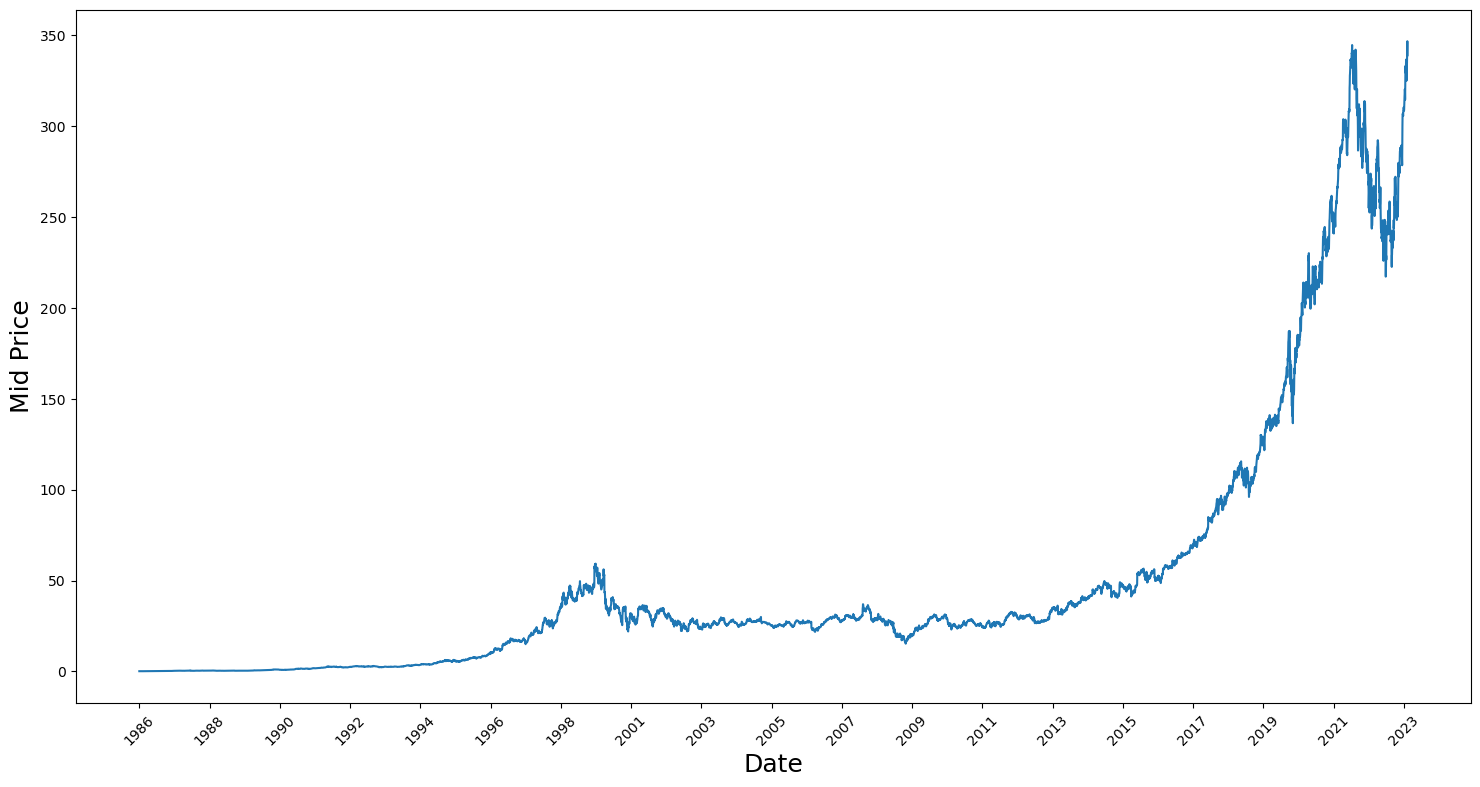

In [16]:
plt.figure(figsize = (18,9))
plt.plot(range(clean_data.shape[0]),(clean_data['Low']+clean_data['High'])/2.0)
plt.xticks(range(0,clean_data.shape[0],500),clean_data['year'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [17]:
X=clean_data.drop('Adj Close',axis=1)
y=clean_data['Adj Close']

# Regression Models

In [18]:
#splitting test and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=50)


Linear Regression

In [19]:
lreg = LinearRegression()

# Model Training
lreg.fit(X_train,y_train)

# Model Prediction
y_pred_lreg = lreg.predict(X_test)

# Model Performance
mae = metrics.mean_absolute_error(y_test, y_pred_lreg)
mse = metrics.mean_squared_error(y_test, y_pred_lreg)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_lreg)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 2.718612448147961
MSE: 13.377975666271876
RMSE: 3.657591511674298
R-Squared: 0.9975529325779853


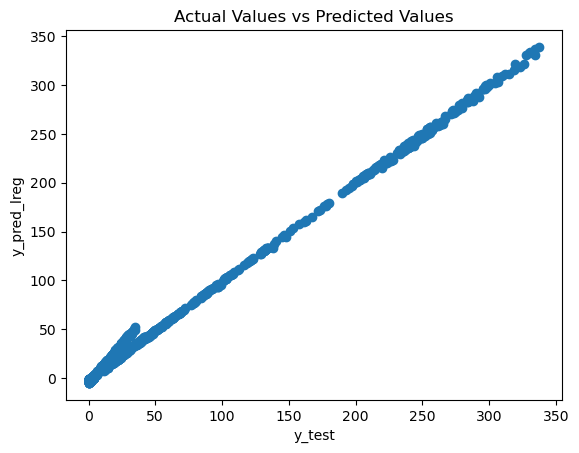

In [20]:
# Plotting
plt.scatter(y_test, y_pred_lreg)
plt.xlabel('y_test')
plt.ylabel('y_pred_lreg')
plt.title('Actual Values vs Predicted Values')
plt.show()

SVM

In [21]:
clf = svm.SVR()

# Model Training
clf.fit(X_train,y_train)

# Model Prediction
y_pred_svm = clf.predict(X_test)

# Model Performance
mae = metrics.mean_absolute_error(y_test, y_pred_svm)
mse = metrics.mean_squared_error(y_test, y_pred_svm)
rmse = mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_svm)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 34.915659421966176
MSE: 5070.340537831026
RMSE: 71.20632372079763
R-Squared: 0.07254539414896644


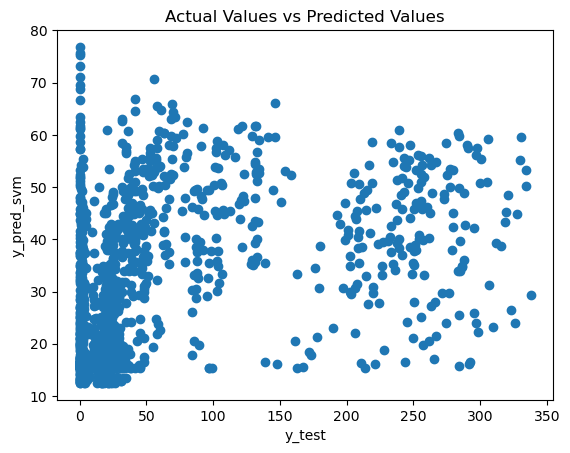

In [22]:
# Plotting
plt.scatter(y_test, y_pred_svm)
plt.xlabel('y_test')
plt.ylabel('y_pred_svm')
plt.title('Actual Values vs Predicted Values')
plt.show()

Decision Tree

In [23]:
dTree = DecisionTreeRegressor()

# Model Training
dTree.fit(X_train,y_train)

# Model Prediction
y_pred_dTree = dTree.predict(X_test)

# Model Performance
mae = metrics.mean_absolute_error(y_test, y_pred_dTree)
mse = metrics.mean_squared_error(y_test, y_pred_dTree)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_dTree)

print("Results")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results
MAE: 0.17743497391694346
MSE: 0.24157438732843595
RMSE: 0.4915021742865803
R-Squared: 0.9999558117888706


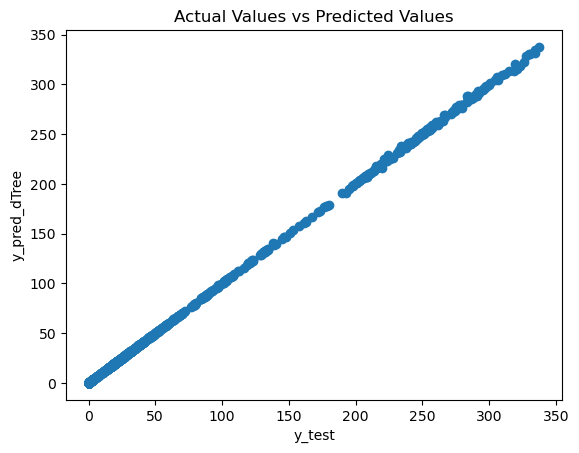

In [24]:
# Plotting
plt.scatter(y_test, y_pred_dTree)
plt.xlabel('y_test')
plt.ylabel('y_pred_dTree')
plt.title('Actual Values vs Predicted Values')
plt.show()

K-NN

In [25]:
knn = KNeighborsRegressor(n_neighbors=2)

# Model Training
knn.fit(X_train,y_train)

# Model Prediction
y_pred_knn = knn.predict(X_test)

# Model Performance
mae = metrics.mean_absolute_error(y_test, y_pred_dTree)
mse = metrics.mean_squared_error(y_test, y_pred_dTree)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_dTree)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.17743497391694346
MSE: 0.24157438732843595
RMSE: 0.4915021742865803
R-Squared: 0.9999558117888706


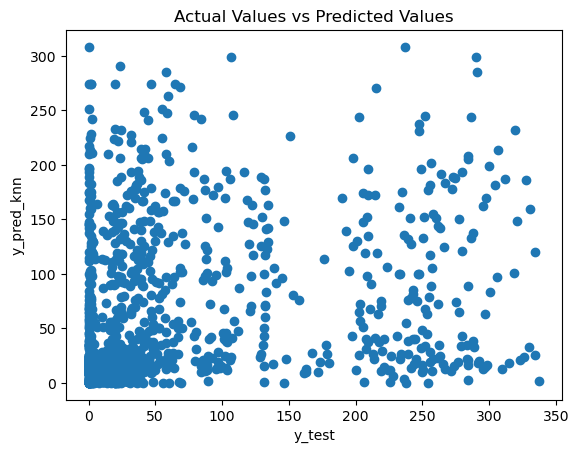

In [26]:
# Plotting
plt.scatter(y_test, y_pred_knn)
plt.xlabel('y_test')
plt.ylabel('y_pred_knn')
plt.title('Actual Values vs Predicted Values')
plt.show()

# Ensemble Model (Bagging and Boosting)

Random Forest

In [27]:
rf_reg=RandomForestRegressor(n_estimators=100)

# Model Training
rf_reg.fit(X_train,y_train)

# Model Prediction
prediction=rf_reg.predict(X_test)

# Model Performance
mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, prediction)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 0.15074464504739682
MSE: 0.16429292511913868
RMSE: 0.4053306367882135
R-Squared: 0.9999699479297349


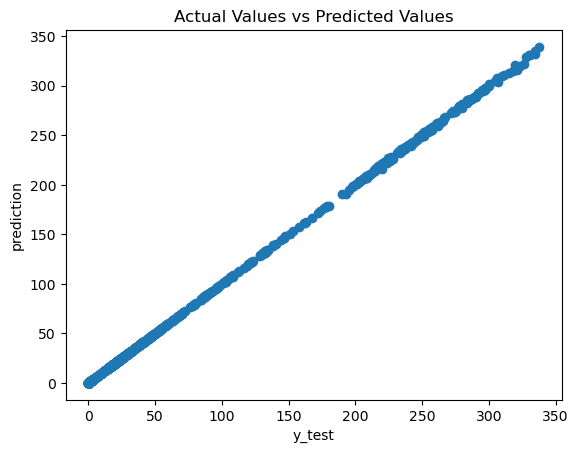

In [28]:
# Plotting
plt.scatter(y_test, prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.title('Actual Values vs Predicted Values')
plt.show()

# LSTM model

In [29]:
#Load the dataset
stock2 = pd.read_csv('msft-daily-max.csv')
stock2['Date'] = pd.to_datetime(stock2['Date'])

In [30]:
print(f'DataFrame contains stock prices between {stock2.Date.min()} {stock2.Date.max()}')
print(f'Total days = {(stock2.Date.max() - stock2.Date.min()).days} days')

DataFrame contains stock prices between 1986-03-13 00:00:00 2023-06-20 00:00:00
Total days = 13613 days


In [31]:
stock2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800,0.060524
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000,0.062686
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200,0.063767
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400,0.062145
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400,0.061065


In [32]:
# Outlier detection

q1, q3 = np.percentile(stock2['Open'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock2[(stock2['Open'] >= lower_bound)
                & (stock2['Open'] <= upper_bound)]

q1, q3 = np.percentile(stock2['High'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock2[(stock2['High'] >= lower_bound)
                & (stock2['High'] <= upper_bound)]

q1, q3 = np.percentile(stock2['Low'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock2[(stock2['Low'] >= lower_bound)
                & (stock2['Low'] <= upper_bound)]

q1, q3 = np.percentile(stock2['Close'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock2[(stock2['Close'] >= lower_bound)
                & (stock2['Close'] <= upper_bound)]

q1, q3 = np.percentile(stock2['Adj Close'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock2[(stock2['Adj Close'] >= lower_bound)
                & (stock2['Adj Close'] <= upper_bound)]

q1, q3 = np.percentile(stock2['Volume'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = stock2[(stock2['Volume'] >= lower_bound)
                & (stock2['Volume'] <= upper_bound)]

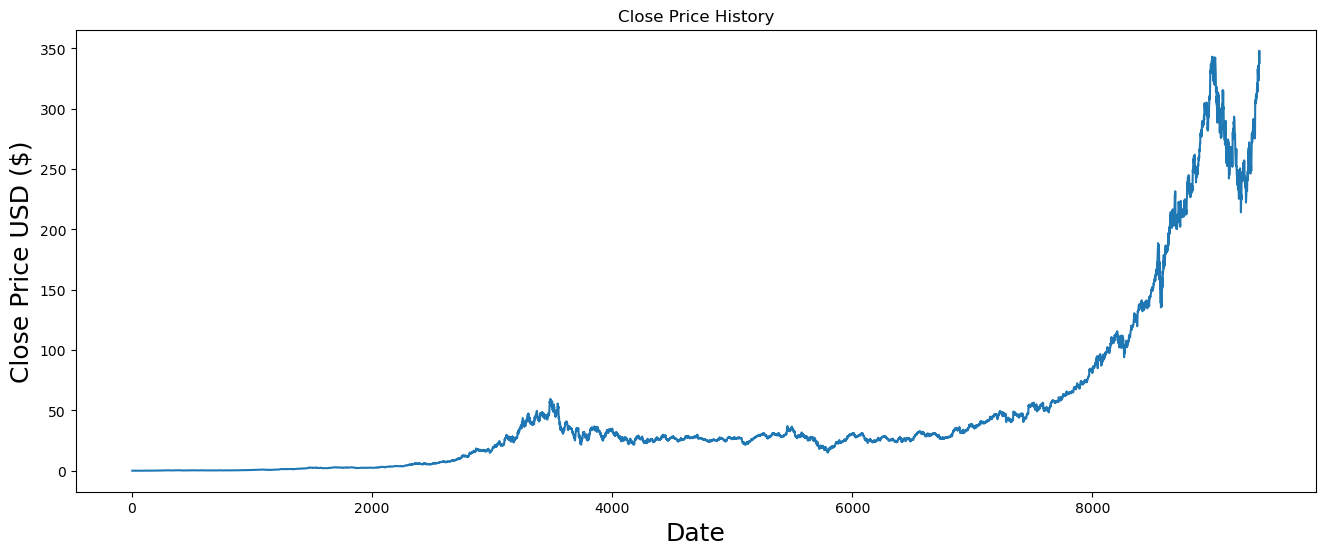

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(clean_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
# Create a new dataframe with only the 'Close column
data = clean_data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

8575

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.74360175e-05],
       [2.24476484e-05],
       [1.49650989e-05],
       ...,
       [1.00000000e+00],
       [9.83419948e-01],
       [9.71121444e-01]])

In [36]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([2.74360175e-05, 2.24476484e-05, 1.49650989e-05, 7.48254945e-06,
       0.00000000e+00, 4.98836630e-06, 1.24709158e-05, 1.74592821e-05,
       1.49650989e-05, 1.24709158e-05, 1.49650989e-05, 1.74592821e-05,
       1.74592821e-05, 1.24709158e-05, 1.49650989e-05, 1.99534652e-05,
       2.24476484e-05, 2.74360175e-05, 2.99302007e-05, 2.99302007e-05,
       3.99098010e-05, 4.24039870e-05, 3.24272516e-05, 3.24272516e-05,
       2.74360175e-05, 2.86830976e-05, 5.73690859e-05, 7.73254218e-05,
       7.98196049e-05, 6.98400046e-05, 6.23574522e-05, 5.73690859e-05,
       5.73690859e-05, 5.48749028e-05, 5.73690859e-05, 5.73690859e-05,
       5.98632691e-05, 5.73690859e-05, 5.98632691e-05, 6.23574522e-05,
       5.98632691e-05, 5.98632691e-05, 6.23574522e-05, 5.73690859e-05,
       5.48749028e-05, 4.98865365e-05, 4.98865365e-05, 4.98865365e-05,
       5.98632691e-05, 6.98400046e-05, 7.73254218e-05, 8.97963404e-05,
       7.98196049e-05, 7.98196049e-05, 7.73254218e-05, 8.23137881e-05,
     

In [37]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2024-02-11 08:20:14.896332: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-11 08:20:14.896375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:XPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: XPU, pci bus id: <undefined>)
2024-02-11 08:20:17.236633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type XPU is enabled.


8515/8515 [==============================] - 793s 93ms/step - loss: 5.0090e-04


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15/15 [==============================] - 1s 32ms/step


12.949712870962856

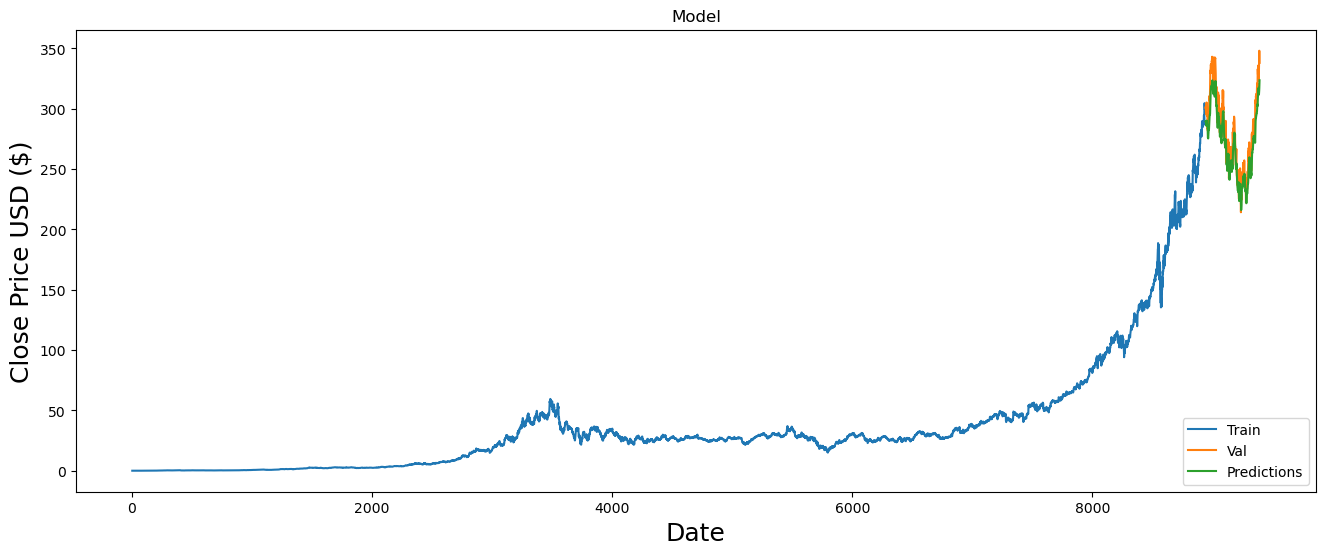

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
valid

,Close,Predictions
8942,301.149994,289.441162
8943,301.140015,289.357849
8944,300.179993,289.245728
8945,300.209992,288.910461
8946,297.250000,288.644928
...,...,...
9388,334.290008,312.825531
9389,337.339996,314.724091
9390,348.100006,317.045258
9391,342.329987,321.559967
